## Life Span Prediction

In [2]:
# importing the dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset into a pandas dataframe

df = pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
# to view the number of columns and rows in the dataframe

df.shape

(2938, 22)

In [5]:
# to print the first five rows of the dataset

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# to check if nool values present in the dataframe

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
# to get some basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# to get the statistical values from the dataset

df.describe(include = 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [9]:
# converting the range of population to a more convenient one

df['Population'] = df['Population']/1000000

In [10]:
# printing the first five rows of the dataset

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,18.2,0.454,9.5


In [11]:
# dropping thw rows having null values

df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [12]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
df.shape

(1649, 22)

In [14]:
# storing the values of Turkey

Turkey = df[df['Country'] == 'Turkey']

In [15]:
Turkey

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2682,Turkey,2014,Developing,75.5,17.0,16,1.45,181.908378,96.0,565,...,96.0,5.41,96.0,0.1,12127.225220,0.773628,4.9,4.7,0.759,14.5
2683,Turkey,2013,Developing,75.2,19.0,17,1.41,188.144035,97.0,7405,...,98.0,5.38,98.0,0.1,12542.935650,75.787333,4.9,4.7,0.754,14.4
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,97.0,5.24,97.0,0.1,1172.384300,74.569867,4.9,4.7,0.750,14.3
2685,Turkey,2011,Developing,74.5,114.0,20,1.53,1275.877569,96.0,111,...,97.0,5.29,97.0,0.1,11341.133950,7.349455,4.9,4.7,0.737,13.8
2686,Turkey,2010,Developing,74.2,116.0,21,1.49,32.782358,96.0,7,...,97.0,5.61,97.0,0.1,1672.569300,72.326914,4.9,4.7,0.715,13.0
2687,Turkey,2009,Developing,73.9,118.0,23,1.40,106.948290,94.0,4,...,96.0,6.80,96.0,0.1,936.499911,71.339185,4.9,4.8,0.709,12.5
2688,Turkey,2008,Developing,73.5,121.0,25,1.39,22.672718,92.0,0,...,96.0,6.70,96.0,0.1,185.689750,0.074432,5.0,4.8,0.705,12.5
2689,Turkey,2007,Developing,73.2,124.0,26,1.26,115.580110,96.0,3,...,96.0,6.40,96.0,0.1,979.492460,69.597281,5.0,4.8,0.697,12.3
2690,Turkey,2006,Developing,72.8,126.0,28,1.29,103.523776,82.0,34,...,9.0,5.81,9.0,0.1,834.869161,6.876345,5.0,4.8,0.687,11.9
2691,Turkey,2005,Developing,72.4,129.0,30,1.29,832.955206,85.0,6200,...,9.0,5.45,9.0,0.1,7384.354661,0.679346,5.0,4.9,0.681,11.9


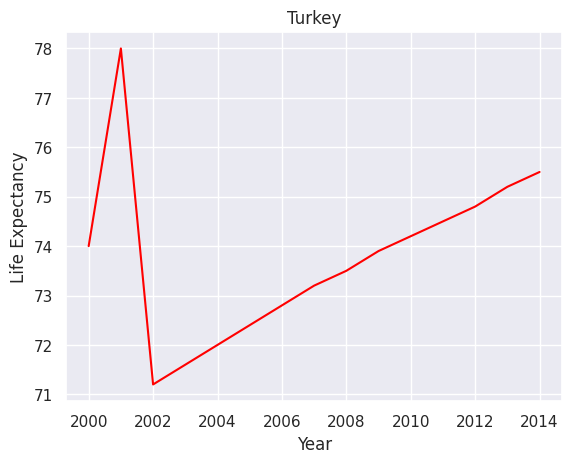

In [16]:
# Visualising the data of Turkey

plt.plot(Turkey['Year'], Turkey['Life expectancy '], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title("Turkey")
plt.show()

In [17]:
# counting the labels in the Status feature

df['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

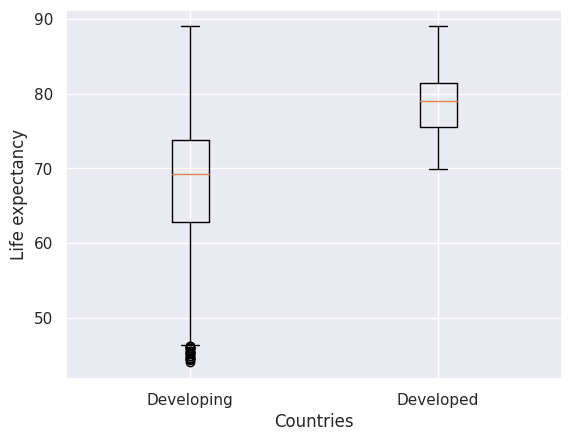

In [18]:
# Visualising the data in a box plot

plt.boxplot([df[df['Status']=='Developing']['Life expectancy '], df[df['Status']=='Developed']['Life expectancy ']], labels=['Developing','Developed'])
plt.ylabel('Life expectancy')
plt.xlabel('Countries')
plt.show()

In [19]:
 # Sorting the values in the dataset using their Life Expectancy as a reference

 df.sort_values("Life expectancy ")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1583,Malawi,2002,Developing,44.0,67.0,46,1.10,3.885395,64.0,92,...,79.0,4.82,64.0,24.7,29.979898,1.213711,7.7,7.6,0.388,10.4
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.4,0.407,9.2
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,87.0,0,...,88.0,6.30,89.0,34.8,862.946312,1.949543,9.3,9.2,0.437,10.7
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.9,0.418,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,0.129432,9.0,9.0,0.406,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,France,2008,Developing,89.0,88.0,3,11.90,7002.785925,47.0,604,...,98.0,1.57,98.0,0.1,45413.657100,6.437499,0.6,0.6,0.877,16.1
2056,Portugal,2014,Developed,89.0,78.0,0,9.88,271.254553,98.0,0,...,98.0,9.50,98.0,0.1,2277.536130,0.014162,0.7,0.5,0.837,16.8
995,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.0,443,...,94.0,11.30,95.0,0.1,4792.652880,0.089825,1.1,1.1,0.920,17.0
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.396840,0.112957,1.0,1.0,0.890,16.3


Converting the columns into 0's and 1's to use it in the model

In [20]:
# Data Encoding

l_encoder= preprocessing.LabelEncoder()
df.loc[:,'Status'] = l_encoder.fit_transform(df.loc[:,'Status'])
df['Status'].value_counts()

1    1407
0     242
Name: Status, dtype: int64

In [21]:
df.loc[:, 'Country'] = l_encoder.fit_transform(df.loc[:, 'Country'])
df['Country'].value_counts()

0      16
1      16
65     15
80     15
79     15
       ..
58      5
115     4
88      4
53      2
38      1
Name: Country, Length: 133, dtype: int64

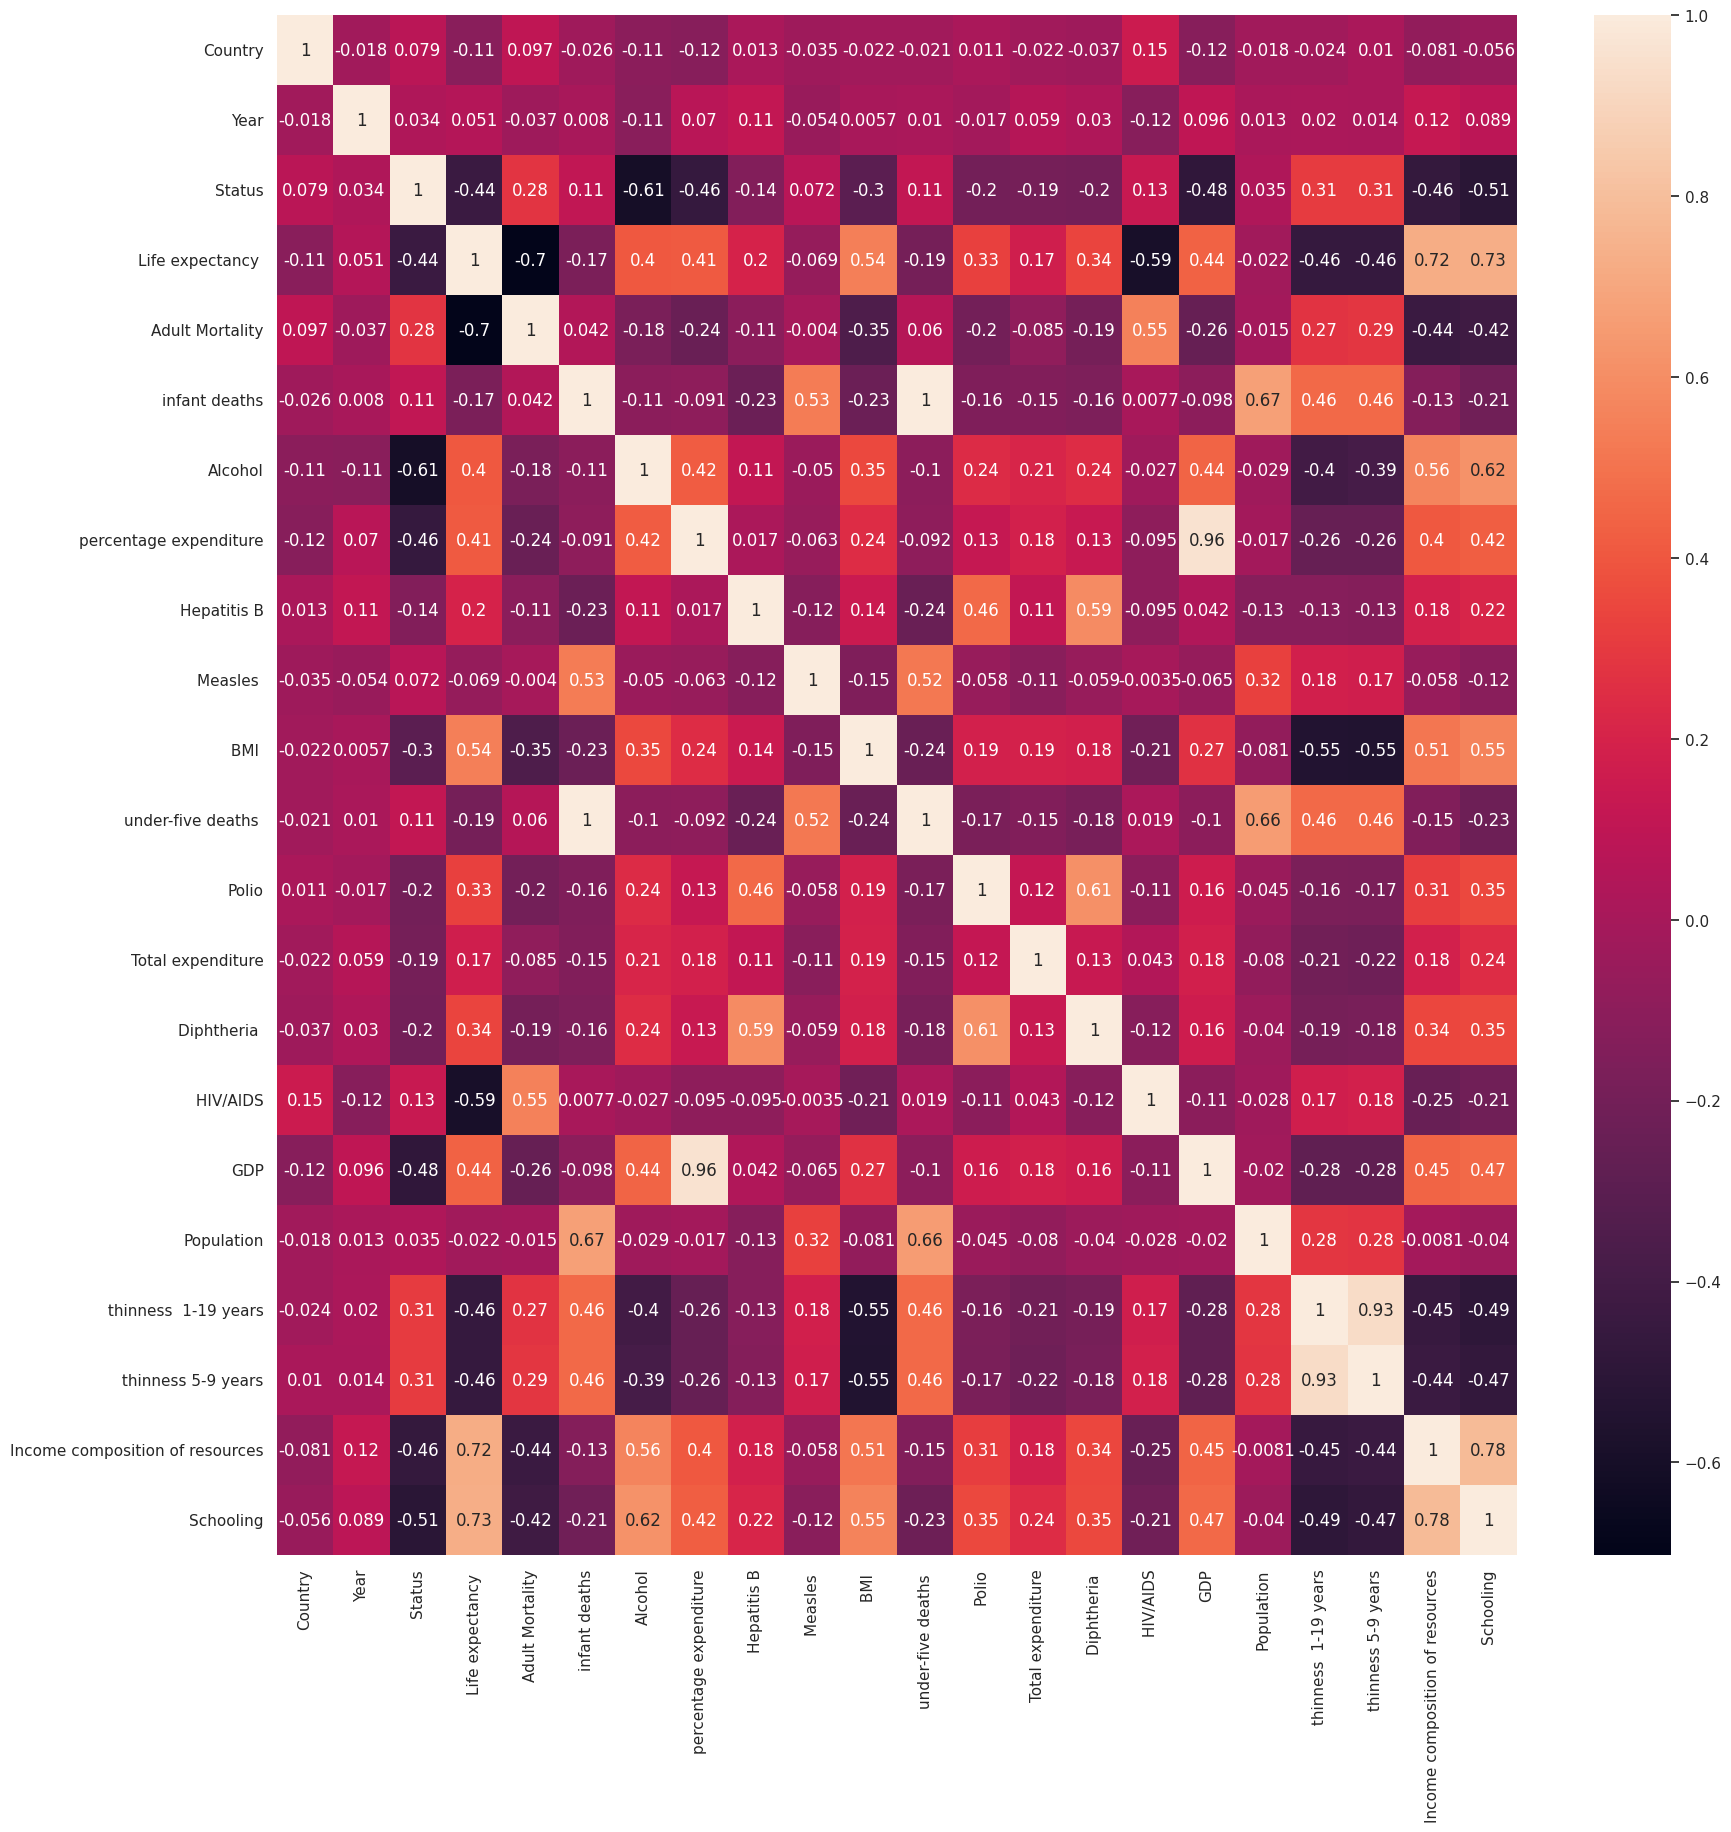

In [22]:
# Constructing a heatmap to understand the relationship between the features

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [23]:
# Dropping the columns which do not affect the Life Expectancy

df =df.drop(labels=['Income composition of resources', ' thinness 5-9 years',
                'infant deaths', 'percentage expenditure'], axis=1)

In [24]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,10.1
1,0,2014,1,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,10.0
2,0,2013,1,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,9.9
3,0,2012,1,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,9.8
4,0,2011,1,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,9.5


In [25]:
# Splitting the data

y = df['Life expectancy ']
df = df.drop(labels='Life expectancy ', axis=1)

In [26]:
y = y.to_numpy(dtype='float64')

In [27]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f'X_train shape -->{x_train.shape}')
print(f'X_valid shape -->{x_valid.shape}')
print(f'X_test shape -->{x_test.shape}')
print(f'y_train shape -->{y_train.shape}')
print(f'y_valid shape -->{y_valid.shape}')
print(f'y_test shape -->{y_test.shape}')

X_train shape -->(1319, 17)
X_valid shape -->(165, 17)
X_test shape -->(165, 17)
y_train shape -->(1319,)
y_valid shape -->(165,)
y_test shape -->(165,)


In [28]:
# Scaling

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

Model 1: Linear Regression

Using Linear Regression as the first model. Model is trained on the train set and made predictions for validation set. Mean Squared Error is used to compute the loss.

In [29]:
# training the model

model = linear_model.LinearRegression()
model.fit(X=x_train, y=y_train)
val_hat = model.predict(x_valid)
metrics.mean_squared_error(y_valid, val_hat)

14.462229070381305

Model 2: Poisson Regressor

Using Poisson Regressor as the second model. Defined the hyper-parameter alpha as 0.1 and maximum iterations is 100. The Mean Squared Error is less than the Linear Regression, so this is our best model.

In [30]:
# training the model

poisson = linear_model.PoissonRegressor(alpha=0.1, max_iter=500)
poisson.fit(X=x_train, y=y_train)
poi_hat = poisson.predict(x_valid)
metrics.mean_squared_error(y_valid, poi_hat)

14.393915902266516

Model 3: Gamma Regressor

Using Gamma Regressor as the last model. Used the same parameters as the Poisson Regressor. The Mean Squared Error is higher, so we will use the Poisson Regressor on our test set.

In [31]:
# training the model

gamma = linear_model.GammaRegressor(alpha=0.1, max_iter=500)
gamma.fit(x_train, y_train)
gamma_val = gamma.predict(x_valid)
metrics.mean_squared_error(y_valid, gamma_val)

14.525653516888873

In [32]:
poi_test = poisson.predict(x_test)
metrics.r2_score(y_test, poi_test)

0.8115671625251021